In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("cStick.csv")
df

,Distance,Pressure,HRV,Sugar level,SpO2,Accelerometer,Decision
0,25.540,1.0,101.396,61.080,87.770,1.0,1
1,2.595,2.0,110.190,20.207,65.190,1.0,2
2,68.067,0.0,87.412,79.345,99.345,0.0,0
3,13.090,1.0,92.266,36.180,81.545,1.0,1
4,69.430,0.0,89.480,80.000,99.990,0.0,0
...,...,...,...,...,...,...,...
2034,5.655,2.0,116.310,162.242,71.310,1.0,2
2035,9.660,2.0,124.320,177.995,79.320,1.0,2
2036,15.220,1.0,93.828,40.440,82.610,1.0,1
2037,9.120,2.0,123.240,175.871,78.240,1.0,2


In [4]:
df.isnull().sum()

Distance         0
Pressure         0
HRV              0
Sugar level      0
SpO2             0
Accelerometer    0
Decision         0
dtype: int64

<AxesSubplot:>

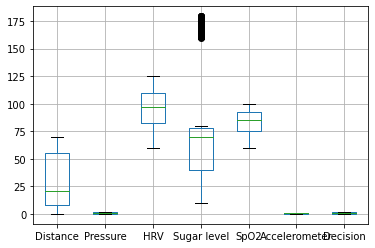

In [5]:
df.boxplot()

In [3]:
df['Decision'].value_counts()

0    690
1    682
2    667
Name: Decision, dtype: int64

In [4]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 6].values

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=40)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [8]:
y_pred = classifier.predict(X_test)

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[137   0   0]
 [  0 129   0]
 [  0   0 142]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       129
           2       1.00      1.00      1.00       142

    accuracy                           1.00       408
   macro avg       1.00      1.00      1.00       408
weighted avg       1.00      1.00      1.00       408



In [10]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

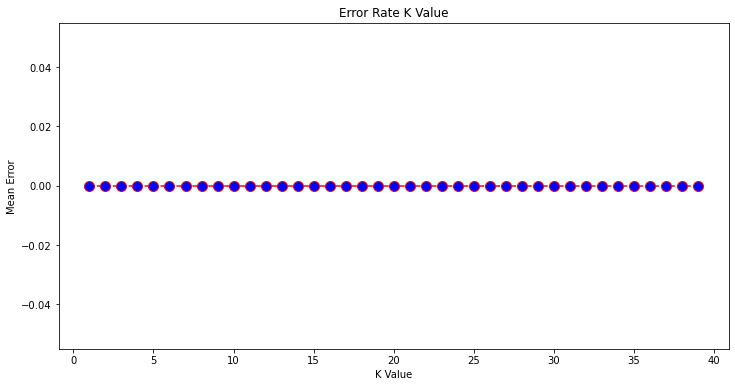

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')